In [127]:
import pandas as pd
import keras
import tensorflow as tf
import numpy as np
from itertools import cycle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

from tensorflow.keras.utils import to_categorical


from numpy.random import seed
seed(42)
tf.random.set_seed(42)
import matplotlib.pyplot as plt 

In [34]:
BATCH_SIZE=256
ALL_RESULTS = []

In [131]:
def plot_results(history, type='accuracy'):
    df = pd.DataFrame(history.history)
    fig, ax = plt.subplots(1,2,figsize=(15,3))
    
    df[['accuracy','val_accuracy']].plot(ax = ax[0])
    df[['loss','val_loss']].plot(ax=ax[1])

def build_model(n_layers=1, units=[16], input_shape=(1,), l_rate=None, dropout=0, regularizer=None ):
    if(len(units) != n_layers):
        raise Exception("The list of units cannot be applied to the n_layers specified!")
    
    model = models.Sequential()
    model.add(layers.Dense(units[0], activation = 'relu', kernel_regularizer=regularizer, input_shape = input_shape))
    if dropout != 0:
        model.add(layers.Dropout(dropout))
    
    for i in np.arange(2,n_layers+1):
        model.add(layers.Dense(units[i-1], kernel_regularizer=regularizer, activation = 'relu'))
        if dropout != 0:
            model.add(layers.Dropout(dropout))
    
    model.add(layers.Dense(10, activation = 'softmax'))
    
    if(l_rate != None and l_rate != 0):
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=l_rate)
    else:
        optimizer = 'rmsprop'

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

def fit_evaluate(model, x_train, y_train, x_val, y_val, epochs, n_layers, units, dropout, regularization):
    history = model.fit(x_train, 
                        y_train,
                        epochs = epochs ,
                        batch_size = BATCH_SIZE,
                        validation_data = (x_val, y_val), verbose=0)
    
    val_loss, val_acc = model.evaluate(x_val, y_val, verbose=0 )
    train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0 )
    print('Training --> Accuracy: %s - Loss: %s'%(train_acc, train_loss))
    print('Validation --> Accuracy: %s - Loss: %s'%(val_acc, val_loss))
    print('-----\n')
    
    ALL_RESULTS.append({
        'n_layers': n_layers,
        'units': units,
        'epochs': epochs,
        'batch_size': BATCH_SIZE,
        'dropout': dropout,
        'regularization': regularization,
        'val_acc': val_acc,
        'val_loss': val_loss,
        'train_acc': train_acc,
        'train_loss': train_loss,
        'history': history
    })
    
    return train_acc, train_loss, val_acc, val_loss
    

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.reshape((len(x_train), 32*32*3))
x_test = x_test.reshape((len(x_test), 32*32*3))
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
input_shape=(x_train.shape[1], )

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [5]:
x_train_partial, x_val , y_train_partial, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [17]:

model = build_model(n_layers=1, units=[8], input_shape=input_shape, l_rate=None )
model.fit(x_train_partial, 
          y_train_partial,
          epochs = 10 ,
          batch_size = BATCH_SIZE,
          validation_data = (x_val, y_val)) 

Epoch 1/10
313/313 [==============================] - 1s 2ms/step - loss: 2.2828 - accuracy: 0.1122 - val_loss: 2.1870 - val_accuracy: 0.1460
Epoch 2/10
313/313 [==============================] - 1s 2ms/step - loss: 2.1608 - accuracy: 0.1618 - val_loss: 2.1653 - val_accuracy: 0.1640
Epoch 3/10
313/313 [==============================] - 1s 2ms/step - loss: 2.1194 - accuracy: 0.1704 - val_loss: 2.0971 - val_accuracy: 0.1851
Epoch 4/10
313/313 [==============================] - 1s 2ms/step - loss: 2.0968 - accuracy: 0.1822 - val_loss: 2.0841 - val_accuracy: 0.1822
Epoch 5/10
313/313 [==============================] - 1s 2ms/step - loss: 2.0820 - accuracy: 0.1863 - val_loss: 2.0662 - val_accuracy: 0.1846
Epoch 6/10
313/313 [==============================] - 1s 2ms/step - loss: 2.0708 - accuracy: 0.1848 - val_loss: 2.0591 - val_accuracy: 0.1890
Epoch 7/10
313/313 [==============================] - 1s 2ms/step - loss: 2.0647 - accuracy: 0.1873 - val_loss: 2.1182 - val_accuracy: 0.1793
Epoch 

In [18]:
test_loss, test_acc = model.evaluate(x_val, y_val )

313/313 [==============================] - 0s 907us/step - loss: 2.0438 - accuracy: 0.1881


In [144]:
#let's try 
ALL_RESULTS = []
curr_val_acc = 0
curr_train_acc = 0
last_val_acc = 0
last_train_acc = 0
units = 32
n_layers = 1
epochs = 10
max_layers = 3
max_units = 256

while True:
    last_val_acc = curr_val_acc
    last_train_acc = curr_train_acc
    model = build_model(n_layers=n_layers, units=[units]*n_layers, input_shape=input_shape, l_rate=None )
    print('Evaluating model with %s layers and %s units, trained on %s epochs\n'%(n_layers, units, epochs))
    
    curr_train_acc, curr_train_loss, curr_val_acc, curr_val_loss = fit_evaluate(model, 
                                                                                x_train_partial, 
                                                                                y_train_partial, 
                                                                                x_val, 
                                                                                y_val, 
                                                                                epochs, 
                                                                                n_layers, 
                                                                                units,
                                                                                0,
                                                                                0)
    

        
    if curr_val_acc < last_val_acc and curr_train_acc > last_train_acc:
        print('Overfitting achieved')
        break
    
    if n_layers == max_layers:
        if units == max_units:
            epochs += 10
        else:
            units = units*2
    else:
        n_layers += 1
        

Evaluating model with 1 layers and 32 units, trained on 10 epochs

Training --> Accuracy: 0.27434998750686646 - Loss: 1.951369285583496
Validation --> Accuracy: 0.2685000002384186 - Loss: 1.9554861783981323
-----

Evaluating model with 2 layers and 32 units, trained on 10 epochs

Training --> Accuracy: 0.3257000148296356 - Loss: 1.9238905906677246
Validation --> Accuracy: 0.31839999556541443 - Loss: 1.9356789588928223
-----

Evaluating model with 3 layers and 32 units, trained on 10 epochs

Training --> Accuracy: 0.3426249921321869 - Loss: 1.8233006000518799
Validation --> Accuracy: 0.33809998631477356 - Loss: 1.8337632417678833
-----

Evaluating model with 3 layers and 64 units, trained on 10 epochs

Training --> Accuracy: 0.37424999475479126 - Loss: 1.7807769775390625
Validation --> Accuracy: 0.3594000041484833 - Loss: 1.8159910440444946
-----

Evaluating model with 3 layers and 128 units, trained on 10 epochs

Training --> Accuracy: 0.3612250089645386 - Loss: 1.8618383407592773
Vali

In [146]:
#Try adding different rates of dropout

hyper_dropout = [0.2, 0.3, 0.4, 0.5]
#hyper_dropout = [0.05]
epochs = 30
for dropout in hyper_dropout:
    model = build_model(n_layers=n_layers, units=[units]*(n_layers), input_shape=input_shape, l_rate=None, dropout=dropout)
    print('Evaluating model with %s layers and %s units, trained on %s epochs with %s dropout \n '%(n_layers, units, epochs, dropout))
    fit_evaluate(model, 
                 x_train_partial, 
                 y_train_partial, 
                 x_val, 
                 y_val, 
                 epochs, 
                 n_layers, 
                 units,
                 dropout,
                 0)


Evaluating model with 3 layers and 256 units, trained on 30 epochs with 0.2 dropout 
 
Training --> Accuracy: 0.49687498807907104 - Loss: 1.419031023979187
Validation --> Accuracy: 0.46399998664855957 - Loss: 1.5129882097244263
-----

Evaluating model with 3 layers and 256 units, trained on 30 epochs with 0.3 dropout 
 
Training --> Accuracy: 0.44362500309944153 - Loss: 1.5866676568984985
Validation --> Accuracy: 0.4207000136375427 - Loss: 1.6372321844100952
-----

Evaluating model with 3 layers and 256 units, trained on 30 epochs with 0.4 dropout 
 
Training --> Accuracy: 0.39387500286102295 - Loss: 1.739349603652954
Validation --> Accuracy: 0.38339999318122864 - Loss: 1.7581796646118164
-----

Evaluating model with 3 layers and 256 units, trained on 30 epochs with 0.5 dropout 
 
Training --> Accuracy: 0.3293749988079071 - Loss: 1.9379888772964478
Validation --> Accuracy: 0.3273000121116638 - Loss: 1.9434293508529663
-----



In [148]:

#Architecture tweaks

hyper_layers=[2,4]
#hyper_layers=[4]
dropout = 0.2
epochs = 60
for l in hyper_layers:
    model = build_model(n_layers=l, units=[units]*(l), input_shape=input_shape, l_rate=None, dropout=dropout)
    print('Evaluating model with %s layers and %s units, trained on %s epochs with %s dropout \n '%(l, units, epochs, dropout))
    fit_evaluate(model, 
                 x_train_partial, 
                 y_train_partial, 
                 x_val, 
                 y_val, 
                 epochs, 
                 l, 
                 units,
                 dropout,
                 0)


Evaluating model with 2 layers and 256 units, trained on 60 epochs with 0.2 dropout 
 
Training --> Accuracy: 0.5260000228881836 - Loss: 1.3474806547164917
Validation --> Accuracy: 0.4634000062942505 - Loss: 1.5006376504898071
-----

Evaluating model with 4 layers and 256 units, trained on 60 epochs with 0.2 dropout 
 
Training --> Accuracy: 0.48522499203681946 - Loss: 1.4300755262374878
Validation --> Accuracy: 0.4375999867916107 - Loss: 1.5557050704956055
-----



In [150]:
#Layers dimension tweaks

hyper_units = [128, 160, 192, 224, 288, 320, 352]
n_layers = 2
#hyper_units=[160]
dropout=0.2
epochs= 60
for u in hyper_units:
    model = build_model(n_layers=n_layers, units=[u]*(n_layers), input_shape=input_shape, l_rate=None, dropout=dropout)
    print('Evaluating model with %s layers and %s units, trained on %s epochs with %s dropout \n '%(n_layers, u, epochs, dropout))
    fit_evaluate(model, 
                 x_train_partial, 
                 y_train_partial, 
                 x_val, 
                 y_val, 
                 epochs, 
                 n_layers, 
                 u,
                 dropout,
                 0)

Evaluating model with 2 layers and 128 units, trained on 60 epochs with 0.2 dropout 
 
Training --> Accuracy: 0.4578000009059906 - Loss: 1.5275192260742188
Validation --> Accuracy: 0.423799991607666 - Loss: 1.607377290725708
-----

Evaluating model with 2 layers and 160 units, trained on 60 epochs with 0.2 dropout 
 
Training --> Accuracy: 0.5050250291824341 - Loss: 1.4085066318511963
Validation --> Accuracy: 0.45260000228881836 - Loss: 1.527567744255066
-----

Evaluating model with 2 layers and 192 units, trained on 60 epochs with 0.2 dropout 
 
Training --> Accuracy: 0.49822500348091125 - Loss: 1.4062113761901855
Validation --> Accuracy: 0.4537000060081482 - Loss: 1.5308088064193726
-----

Evaluating model with 2 layers and 224 units, trained on 60 epochs with 0.2 dropout 
 
Training --> Accuracy: 0.5297250151634216 - Loss: 1.3448021411895752
Validation --> Accuracy: 0.4742000102996826 - Loss: 1.4788646697998047
-----

Evaluating model with 2 layers and 288 units, trained on 60 epoch

In [151]:
#Learning rate tweaks

hyper_l_rates = [ 0.0001,  0.0002,  0.0004,  0.006,  0.0008]
n_layers = 2
units = 288
#hyper_units=[160]
dropout=0.2
epochs= 60
for l_rate in hyper_l_rates:
    model = build_model(n_layers=n_layers, units=[units]*(n_layers), input_shape=input_shape, l_rate=l_rate, dropout=dropout)
    print('Evaluating model with %s layers and %s units, trained on %s epochs with %s dropout \n '%(n_layers, units, epochs, dropout))
    fit_evaluate(model, 
                 x_train_partial, 
                 y_train_partial, 
                 x_val, 
                 y_val, 
                 epochs, 
                 n_layers, 
                 units,
                 dropout,
                 0)

Evaluating model with 2 layers and 288 units, trained on 60 epochs with 0.2 dropout 
 
Training --> Accuracy: 0.6174749732017517 - Loss: 1.1101725101470947
Validation --> Accuracy: 0.5228000283241272 - Loss: 1.3663853406906128
-----

Evaluating model with 2 layers and 288 units, trained on 60 epochs with 0.2 dropout 
 
Training --> Accuracy: 0.6399499773979187 - Loss: 1.062314748764038
Validation --> Accuracy: 0.5252000093460083 - Loss: 1.3563653230667114
-----

Evaluating model with 2 layers and 288 units, trained on 60 epochs with 0.2 dropout 
 
Training --> Accuracy: 0.6080499887466431 - Loss: 1.1232891082763672
Validation --> Accuracy: 0.504800021648407 - Loss: 1.4025542736053467
-----

Evaluating model with 2 layers and 288 units, trained on 60 epochs with 0.2 dropout 
 
Training --> Accuracy: 0.34244999289512634 - Loss: 1.8115112781524658
Validation --> Accuracy: 0.33219999074935913 - Loss: 1.827676773071289
-----

Evaluating model with 2 layers and 288 units, trained on 60 epoch

In [152]:
model = models.Sequential()
model.add(layers.Dense(288, activation = 'relu', input_shape = input_shape))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(288, activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation = 'softmax'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0002)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, 
                        y_train,
                        epochs = 60 ,
                        batch_size = BATCH_SIZE,
                        validation_data = (x_test, y_test))
    
model.evaluate(x_val, y_val)
model.evaluate(x_train, y_train )


Epoch 1/60
196/196 [==============================] - 3s 14ms/step - loss: 2.0234 - accuracy: 0.2667 - val_loss: 1.8930 - val_accuracy: 0.3065
Epoch 2/60
196/196 [==============================] - 2s 11ms/step - loss: 1.8462 - accuracy: 0.3397 - val_loss: 1.7403 - val_accuracy: 0.3800
Epoch 3/60
196/196 [==============================] - 2s 11ms/step - loss: 1.7701 - accuracy: 0.3702 - val_loss: 1.7369 - val_accuracy: 0.3811
Epoch 4/60
196/196 [==============================] - 2s 11ms/step - loss: 1.7257 - accuracy: 0.3882 - val_loss: 1.7528 - val_accuracy: 0.3777
Epoch 5/60
196/196 [==============================] - 2s 12ms/step - loss: 1.6841 - accuracy: 0.4045 - val_loss: 1.6387 - val_accuracy: 0.4168
Epoch 6/60
196/196 [==============================] - 2s 11ms/step - loss: 1.6479 - accuracy: 0.4152 - val_loss: 1.6258 - val_accuracy: 0.4195
Epoch 7/60
196/196 [==============================] - 2s 12ms/step - loss: 1.6224 - accuracy: 0.4250 - val_loss: 1.5933 - val_accuracy: 0.4367

Epoch 58/60
196/196 [==============================] - 2s 12ms/step - loss: 1.1478 - accuracy: 0.5928 - val_loss: 1.3026 - val_accuracy: 0.5420
Epoch 59/60
196/196 [==============================] - 2s 12ms/step - loss: 1.1397 - accuracy: 0.5952 - val_loss: 1.3614 - val_accuracy: 0.5150
Epoch 60/60
1563/1563 [==============================] - 2s 1ms/step - loss: 1.0517 - accuracy: 0.6250


[1.0517017841339111, 0.6249799728393555]

In [154]:
model.evaluate(x_test, y_test)
model.evaluate(x_train, y_train)

1563/1563 [==============================] - 2s 1ms/step - loss: 1.0517 - accuracy: 0.6250


[1.0517017841339111, 0.6249799728393555]

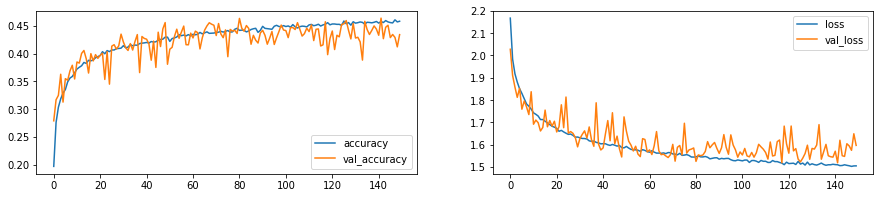

In [133]:
df = pd.DataFrame(ALL_RESULTS)
df
plot_results(df.iloc[53].history)

In [124]:
df = pd.DataFrame(ALL_RESULTS)
df

,n_layers,units,epochs,batch_size,dropout,regularization,val_acc,val_loss,train_acc,train_loss,history
0,1,32,40,256,0.00,0,0.4129,1.660279,0.440500,1.617433,<keras.callbacks.History object at 0x7fbfcffa8...
1,2,32,40,256,0.00,0,0.4265,1.635728,0.450975,1.585591,<keras.callbacks.History object at 0x7fbf5f0ea...
2,3,32,40,256,0.00,0,0.4050,1.658890,0.429525,1.612039,<keras.callbacks.History object at 0x7fbf5ce1e...
3,3,64,40,256,0.00,0,0.4611,1.531043,0.491425,1.455231,<keras.callbacks.History object at 0x7fbf5d5c5...
4,3,128,40,256,0.00,0,0.4727,1.496195,0.524550,1.353036,<keras.callbacks.History object at 0x7fbfc1e1c...
5,3,256,40,256,0.00,0,0.4762,1.520421,0.550625,1.265492,<keras.callbacks.History object at 0x7fbfc57d8...
6,3,256,50,256,0.00,0,0.5021,1.474514,0.601200,1.126561,<keras.callbacks.History object at 0x7fbfcb600...
7,3,256,60,256,0.00,0,0.4908,1.490946,0.610700,1.083660,<keras.callbacks.History object at 0x7fbfcf6fc...
8,3,256,60,256,0.01,0,0.4472,2.221377,0.687275,0.883642,<keras.callbacks.History object at 0x7fbfccf84...
9,3,256,60,256,0.02,0,0.4458,2.013547,0.640350,0.999004,<keras.callbacks.History object at 0x7fbfd1e13...


In [119]:
df = pd.DataFrame(ALL_RESULTS)
df

,n_layers,units,epochs,batch_size,dropout,regularization,val_acc,val_loss,train_acc,train_loss,history
0,1,32,40,256,0.00,0,0.4129,1.660279,0.440500,1.617433,<keras.callbacks.History object at 0x7fbfcffa8...
1,2,32,40,256,0.00,0,0.4265,1.635728,0.450975,1.585591,<keras.callbacks.History object at 0x7fbf5f0ea...
2,3,32,40,256,0.00,0,0.4050,1.658890,0.429525,1.612039,<keras.callbacks.History object at 0x7fbf5ce1e...
3,3,64,40,256,0.00,0,0.4611,1.531043,0.491425,1.455231,<keras.callbacks.History object at 0x7fbf5d5c5...
4,3,128,40,256,0.00,0,0.4727,1.496195,0.524550,1.353036,<keras.callbacks.History object at 0x7fbfc1e1c...
5,3,256,40,256,0.00,0,0.4762,1.520421,0.550625,1.265492,<keras.callbacks.History object at 0x7fbfc57d8...
6,3,256,50,256,0.00,0,0.5021,1.474514,0.601200,1.126561,<keras.callbacks.History object at 0x7fbfcb600...
7,3,256,60,256,0.00,0,0.4908,1.490946,0.610700,1.083660,<keras.callbacks.History object at 0x7fbfcf6fc...
8,3,256,60,256,0.01,0,0.4472,2.221377,0.687275,0.883642,<keras.callbacks.History object at 0x7fbfccf84...
9,3,256,60,256,0.02,0,0.4458,2.013547,0.640350,0.999004,<keras.callbacks.History object at 0x7fbfd1e13...
